Single-layer Perceptron For MNIST Dataset
====


### Load the dataset

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('/tmp/data', one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Visualize a sample subset of data

/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


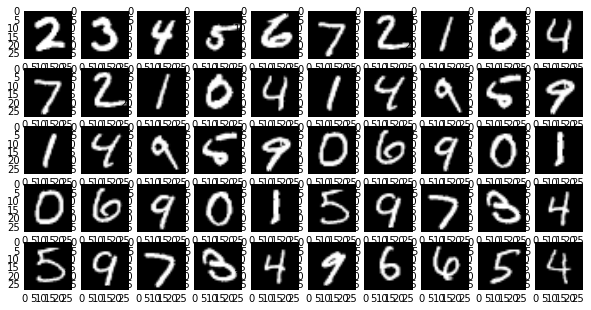

In [2]:
## Visualize a sample subset of data
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

f,a = plt.subplots(5,10,figsize=(10,5))
for i in range(5):
    for j in range(10):
        index = (i-1)*5 + j
        a[i][j].imshow(np.reshape(mnist_data.test.images[index],(28,28)), cmap='Greys_r')
f.show()
plt.draw()

### Side Note: What are Tensors?

 * A vector is one-dimensional
 * A matrix is 2-dimensional
 * A tensor can have $k$ dimenions
 $$\left[\begin{array}{ccc} & & & \\  & & & \\  & & & \end{array}\right]_{n_1\times n_2 \times ... n_k}$$
 
 Read about tensors: Animashree Anand Kumar

### Set Network and Learning Parameters



In [4]:
## set learning parameters
learning_rate = 0.5
batch_size = 128
trainig_iters = 2000
dispay_step = 20


# set network parameters
num_weights = 32
num_dims = 784    ## number of input pixels
num_classes = 10  
num_layers = 1    ## number of hidden layers


# create placeholders for data
x = tf.placeholder(tf.float32, [None, num_dims]) 
y = tf.placeholder(tf.float32, [None, num_classes])
#### 2-D tensor of floating-point numbers, with a shape [None, 784]. 
####  --> None means that a dimension can be of any length


## define weights
weights = tf.Variable(tf.zeros([num_dims, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))


## define the model (network)
y = tf.nn.softmax(tf.matmul(x, weights) + biases)

## define the loss-function: Cross-Entropy Loss Function
#### --> to implement cross-entropy, first add a new placeholder 
####     for the true (onehot emcoder) labels
y_ = tf.placeholder(tf.float32, [None, num_classes])

### One way to define the loss is as follows (but it is numericlly unstable and shoudl be avoided)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#### --> tf.reduce_sum adds the elements in dimension s[ecified by reduction_indices
#### --> tf.reduce_mean computes the mean over all the examples in the batch

## Instead, we use tf.nn.softmax_cross_entropy_with_logits
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))


## Training:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

### Tensorflow Session

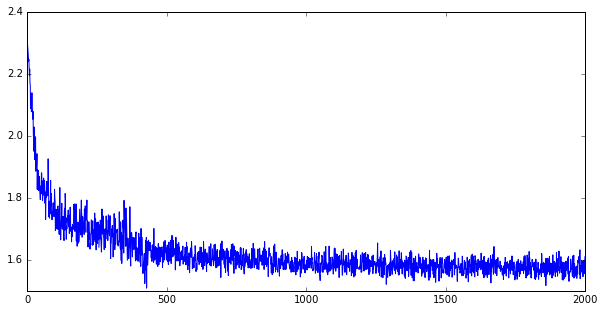

In [5]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

losses = []
for i in range(trainig_iters):
    batch_xs, batch_ys = mnist_data.train.next_batch(batch_size)
    ##sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    _, loss_val = sess.run([train_step, cross_entropy], 
                           feed_dict={x: batch_xs, y_: batch_ys})
    losses.append(loss_val)
    
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(len(losses)), losses)
plt.show()

### Evaluating the model


In [6]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))


accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist_data.test.images, y_: mnist_data.test.labels}))

0.9157


/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


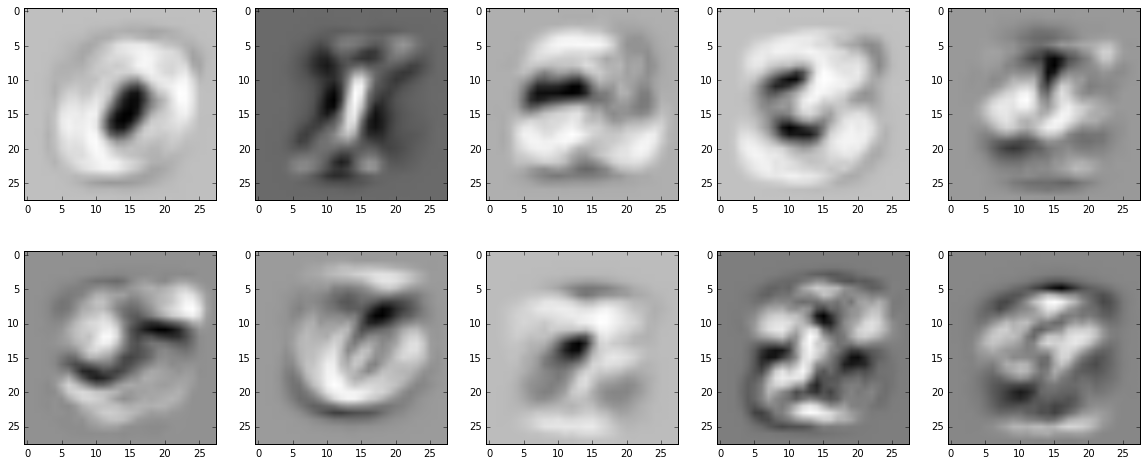

In [7]:
with sess.as_default():
    W = weights.eval()
    fig,ax = plt.subplots(2,5,figsize=(20,8))
    for i in range(10):
            ax[i/5][i%5].imshow(np.reshape(W[:,i], (28,28)), cmap='Greys_r')
    fig.show()
